# SESSION_1  
Botocatu 2024

The goals of this session are to become proficient with Jupyter notebooks by installing Conda packages, to gain a deeper understanding of the Fast5 format, to basecall reads using Guppy/Dorado, and finally, to attempt evaluating the accuracy of Nanopore reads with Rattlesnake.

Prerequisites: In a `terminal` (not here), You need to create the curso_1 env, to install biopython and jupyter and activate the `Conda` env as follow before to start jupyter

!conda create -y --name curso_pratico_1

!conda install -y -n curso_1 -c conda-forge biopython 

!conda install -y -n curso_1 -c anaconda h5py seaborn wget cmake

!conda activate curso_1

And now type in your terminal:

In [4]:
!jypyter notebook

/bin/bash: jypyter: command not found


Navigate to the jupyter page of the course

**Don't forget to put the data.zip file in the session_1 directory and uncompress it !**

# Introduction about OXFORD NANOPORE

`Oxford Nanopore` Technologies is one of the leading companies in sequencing technologies providing direct DNA/RNA sequencing molecules in a portable way. A large variety of sequencer options and sample preparation protocols enabled the process of obtaining long genomic fragments (https://nanoporetech.com/products).  
The immense increase in fragment lengths, with respect to older sequencing generations, greatly facilitate the problem of de novo genome assembly by spanning even the longest repetitive regions. The limitation is the high error rate of the sequencing yield, ranging between 5 % and 15 %. This Notebook is intented to get familiar how the sequencing technology works, which format is used to store the sequencer output and how to translate it to genomic sequences.  
Have a look to this webpage: https://nanoporetech.com/how-it-works/basecalling  

The best way to see how Oxford Nanopore sequencing works is through their promotional videos. Run the cell below to load the YouTube video. (`command + enter` or `execute`)

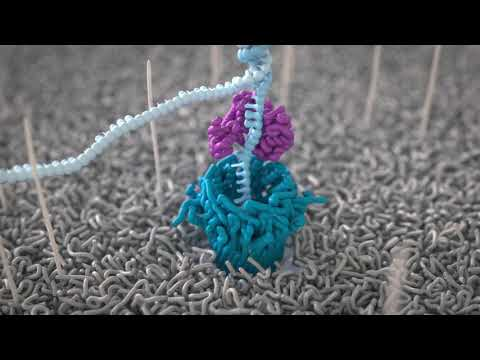

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('RcP85JHLmnI', 560, 315)

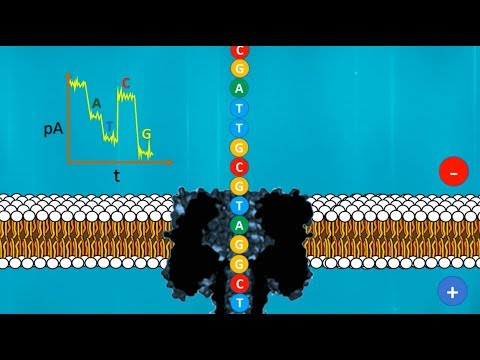

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('iT_A_ucWMls', 560, 315)

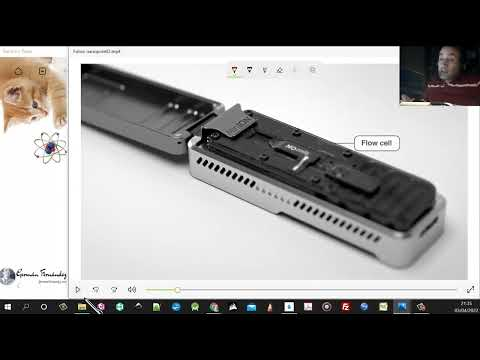

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('ZE5L_ykAMj8', 560, 315) 

A ressource center with protocols and workflow is available at https://nanoporetech.com/resource-centre

Example:  
A workfow for Metagenomic assembly:  
https://nanoporetech.com/sites/default/files/s3/literature/metagenomic-assembly-workflow.pdf  

A workflow for human genome assemby:  
https://nanoporetech.com/sites/default/files/s3/literature/human-genome-assembly-workflow.pdf  

Genome assembly advices: https://nanoporetech.com/applications/investigation/assembly  

Additional information about the technology can be found at https://nanoporetech.com/community. The website features detailed guides for a plethora of sample preparation protocols and hosts the needed software for both sequencing and basecalling.  
Please visit the tutorial page at https://community.nanoporetech.com/knowledge/bioinformatics for more information

# TO KNOW THE fast5 FORMAT

To get a better grasp of the whole matter, we prepared a small dataset of a Bacillus subtilis genome which was sequenced with the R10 nanopore. The output of any Oxford Nanopore sequencer is stored in `fast5` format -or multi `fast5` because it contains a batch of reads in a single file. 
See : [FAST5](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjl78ag6YL5AhWtQTABHWM8Cu8QFnoECAIQAw&url=https%3A%2F%2Fwww.biorxiv.org%2Fcontent%2Fbiorxiv%2Fearly%2F2021%2F06%2F30%2F2021.06.29.450255%2FDC2%2Fembed%2Fmedia-2.pdf%3Fdownload%3Dtrue&usg=AOvVaw1Qc6P-3YAJRPhjk-PVh89o) file.  `fast5` format  is a specialization of the [hdf5](https://www.hdfgroup.org/solutions/hdf5/) file format.  
It is a hierarchical data format, which looks like a filesystem, used to store and organize large datasets. The format is supported in a wide range of programing languages, and the Python API is incorporated in the `h5py` module.

In [5]:
import h5py

fast5 = h5py.File('data/bacillus_subtilis/bs_raw.fast5', mode='r')
fast5.name

'/'

Hierarchy of a Multi-fast5 file:  
The root group (e.g. /) contains a group for each read that is named as “read_” followed by the read identifier

In [6]:
list(fast5.keys())

['read_003084a1-d2fb-4c56-ba98-4efaf05f19ab',
 'read_003f003d-a943-48b6-bf18-31f89f9fbed6',
 'read_004c4765-e16f-4a98-9cb9-41612ef796e5',
 'read_004f8350-7bdb-4ccf-8375-2a945d980b3c',
 'read_0053d848-a30f-45b1-bdf8-ee572303e154',
 'read_008ce7b7-a104-4005-a791-b62502b35164',
 'read_008e0186-094e-4765-a074-00cf40ea28ac',
 'read_009cc6b4-45fe-47b8-b86b-76535556cc88',
 'read_00b00cfe-518a-41ce-9122-22b144cc8861',
 'read_00b7fc27-9851-4c05-803b-564cd5893e43',
 'read_00c2b7ee-ba08-425b-b788-55f176fd7f37',
 'read_00da3d2a-e498-4a3f-8019-a39583ae9a08',
 'read_00e710e7-14d8-4036-9ea1-63966dc0e850',
 'read_00eaa464-bc29-439c-8e8b-c7782ea22016',
 'read_012c7867-d11b-4db4-a74c-db277b32340e',
 'read_0134df74-baee-458c-976c-73e82c40dc01',
 'read_014875b0-4e0d-4a2f-950f-5b9005237c4a',
 'read_01572fc9-a9e5-4ee5-a83b-81e9dc13f8cf',
 'read_015f4166-3bb0-4b9d-b627-63cc4ca3652f',
 'read_016b95d2-1554-41c2-8336-0f2333a43942',
 'read_017d85c7-ee09-47f2-9473-1f7b188cf2e9',
 'read_017df66a-2c3c-409c-8093-323

The object we loaded from the fast5 file is treated as a simple Python dictionary. To get a read, we simply put the desired read name inside brackets `[]`. We can also see the whole object tree with the visit member function. In addition, each object has meta data in its `attrs` member variable.

Under each read group, there are different groups:  

In [7]:
read = fast5['read_003f003d-a943-48b6-bf18-31f89f9fbed6']
read.visit(print)

Raw
Raw/Signal
channel_id
context_tags
tracking_id


Each group has different Attribute name and variable:  

In [12]:
print(read['tracking_id'].attrs['flow_cell_id'])
print(read['tracking_id'].attrs['sample_id'])
print(read['tracking_id'].attrs['device_type'])
print(read['tracking_id'].attrs['protocol_group_id'])
print(read['tracking_id'].attrs['protocol_run_id'])
print(read['tracking_id'].attrs['protocols_version'])


b'FAK79931'
b'Zymo-GridION-Even-3Peaks-Native-R10'
b'gridion'
b'Zymo-GridION-Even-3Peaks-Native-R10'
b'f5e69283-8b57-4404-883f-0fe03d8b0108'
b'1.11.3.1'


The point of interest is the raw electric signal which will be latter translated with the Guppy basecaller into a DNA sequence.

In [6]:
signal = read['Raw']['Signal']
signal.shape

(24028,)

In [7]:
signal[:]

array([337, 282, 288, ..., 204, 205, 200], dtype=int16)

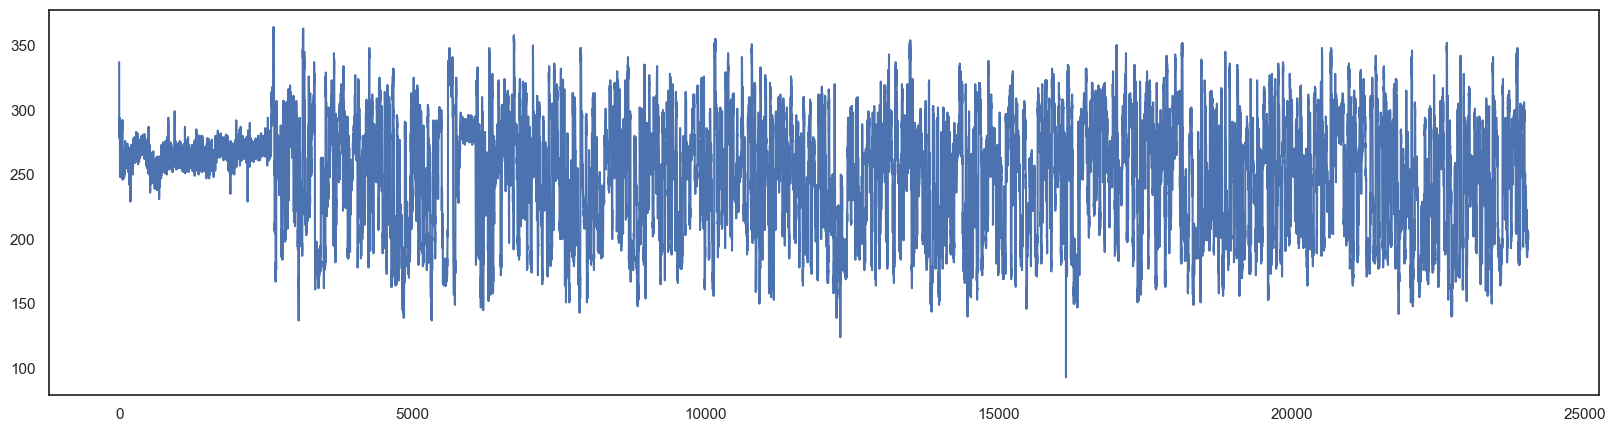

In [8]:
from matplotlib import pyplot
import seaborn

seaborn.set()
seaborn.set_style("white")

pyplot.rcParams["figure.figsize"] = (20,5)

pyplot.plot(signal[:])

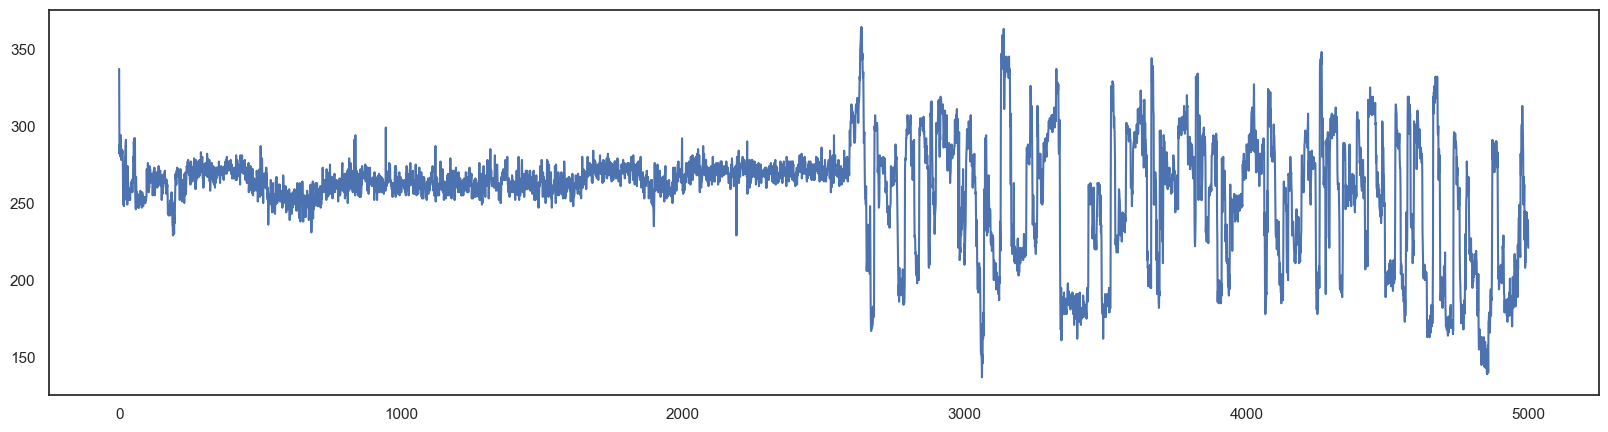

In [9]:
pyplot.plot(signal[0:5000])

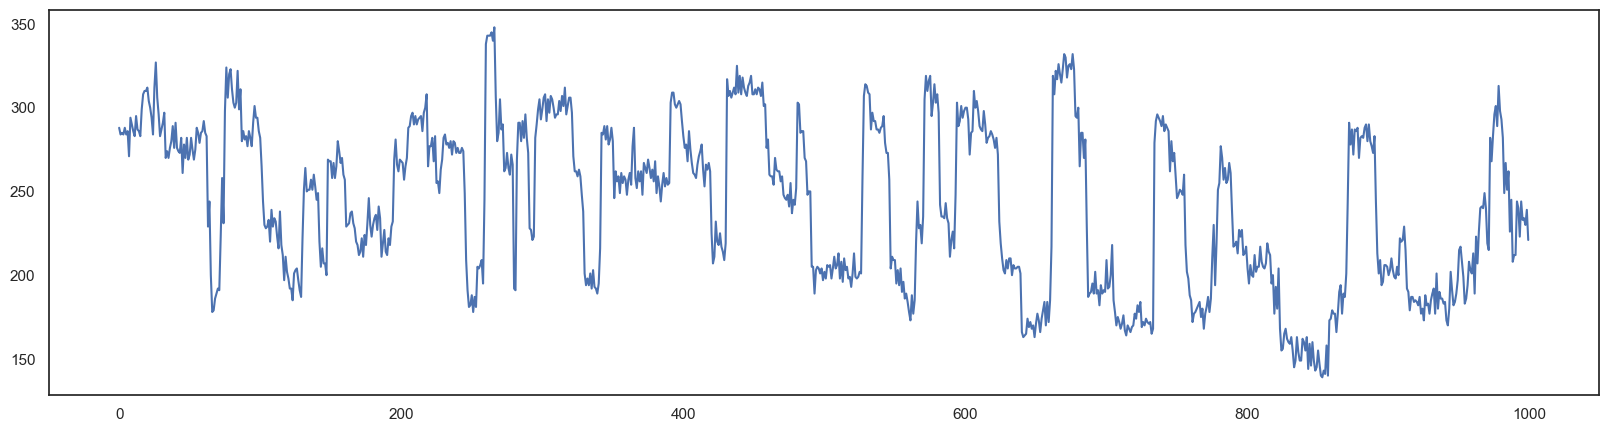

In [10]:
pyplot.plot(signal[4000:5000])

We can easily create a smaller subset of the set we have at the moment. We need to open a new hdf5 file and copy the desired reads to it as below.

In [11]:
read_f = h5py.File('read.fast5', mode='w')
fast5.copy(read, read_f)
read_f.close()

You wrote the desire read as read.fadt5

In [12]:
!ls -lrt


total 10200
-rwxrwxrwx@ 1 guyot  staff  4658055  8 aoû  2022 Session_1_M2_TecnicasSeq.pdf
drwxrwx---  4 guyot  staff      128 24 jan  2023 data
drwxr-xr-x  6 guyot  staff      192  5 mar  2023 reference
-rw-r--r--@ 1 guyot  staff      199 11 mar 07:35 README.md
-rwxr-xr-x  1 guyot  staff   517984 11 mar 07:52 session_1-EN.ipynb
-rw-r--r--  1 guyot  staff    35849 11 mar 07:52 read.fast5


In order to basecall the data we need to download the Guppy basecaller with the following command (pick the appropriate commands with regards to your operating system) and unpack the archive. To see if it is working properly run it without parameters.

# TO BASECALL READS WITH `GUPPY` / `Dorado`

[How works basecalling](https://nanoporetech.com/how-it-works/basecalling)

[Guppy](https://github.com/asadprodhan/GPU-accelerated-guppy-basecalling)  

[Dorado] (https://github.com/nanoporetech/dorado). 

[Tutorial](https://timkahlke.github.io/LongRead_tutorials/BS_G.html)

**FOR GUPPY (new version 6.3.7)**

In [1]:
#for Linux users:  
#!wget https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_linux64.tar.gz
#!tar -xzvf ont-guppy-cpu_4.4.1_linux64.tar.gz

#**#For MAC users only**
!wget https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_osx64.zip
#!unzip ont-guppy-cpu_4.4.1_osx64.zip

--2024-03-11 10:32:10--  https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_osx64.zip
Résolution de mirror.oxfordnanoportal.com (mirror.oxfordnanoportal.com)… 96.126.99.215
Connexion à mirror.oxfordnanoportal.com (mirror.oxfordnanoportal.com)|96.126.99.215|:443… échec : Operation timed out.
Nouvel essai.

--2024-03-11 10:33:29--  (essai :  2)  https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_osx64.zip
Connexion à mirror.oxfordnanoportal.com (mirror.oxfordnanoportal.com)|96.126.99.215|:443… échec : Operation timed out.
Nouvel essai.

--2024-03-11 10:34:46--  (essai :  3)  https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_osx64.zip
Connexion à mirror.oxfordnanoportal.com (mirror.oxfordnanoportal.com)|96.126.99.215|:443… échec : Operation timed out.
Nouvel essai.

--2024-03-11 10:36:04--  (essai :  4)  https://mirror.oxfordnanoportal.com/software/analysis/ont-guppy-cpu_4.4.1_osx64.zip
Connexion à mirror.oxfordnanoport

In [ ]:
!ls

unzip the downloaded file if not done automaticaly by the system

Call the `guppy basecaller` program to see usage

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller

In [ ]:
!ls ont-guppy-cpu/data

The basecalling parameters depend on which flowcell and library preparation kit was used to produce the data

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller --print_workflows

First we will try to translate only one signal in the subset file we created. The below Guppy command searches the current directory for all fast5 files and translates them to [FASTQ](https://en.wikipedia.org/wiki/FASTQ_format) format, using the R10 configuration file.

In [ ]:
!cat ont-guppy-cpu/data/dna_r10_450bps_fast.cfg

In [ ]:
!ls

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller \
    -c ont-guppy-cpu/data/dna_r10_450bps_fast.cfg \
    -i data/bacillus_subtilis \
    -s guppy_read

In [ ]:
!cat guppy_read/fastq_runid_*.fastq

In [ ]:
!cat guppy_read/sequencing_summary.txt

In [ ]:
!ls guppy_all

We can obtain the basecalled read length with the command below.

In [ ]:
!head -n 2 guppy_read/fastq_runid_*.fastq | tail -n 1 | wc

Usually, the basecalling is accompanied with quality control, classifying reads into pass/faill classes.  
Filtering is done with regards to the reads average Phred quality score. For each base, the score is calculated with: $Q = -10log_{10}{P}$, where $P$ is the base-calling error probability.  
For example, a Phred score of $50$ equals the base call accuracy of $99.999\%$.  See [Phred_quality_score](https://en.wikipedia.org/wiki/Phred_quality_score). 
Guppy has options `--qscore_filtering` and `--min_qscore`, first enabling filtering and the second setting the threshold (which is 7 by default). To store all found data into a single fastq file use option `-q 0`. Let us now try to basecall the whole dataset.

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller \
    -c ont-guppy-cpu/data/dna_r10_450bps_fast.cfg \
    -i data/bacillus_subtilis/ \
    -s guppy_all \
    -q 0 \
    --qscore_filtering \
    --min_qscore 7

In [ ]:
!ls guppy_all

In [ ]:
!cat guppy_all/sequencing_summary.txt

**FOR DORADO** To test at home

Dorado uses GPU/CPU access. Dorado uses POD5 format, and it is necessary to reformat Fast5 using [POD5] (https://github.com/nanoporetech/pod5-file-format) 

pod5 convert fast5 bs_raw.fast5 --output bs_raw.pod5

In [ ]:
Download the model

In [ ]:
dorado download

In [ ]:
dorado basecaller
Usage: dorado [-h] [--device VAR] [--read-ids VAR] [--resume-from VAR] [--max-reads VAR] [--min-qscore VAR] [--batchsize VAR] [--chunksize VAR] [--overlap VAR] [--recursive] [--modified-bases VAR...] [--modified-bases-models VAR] [--modified-bases-threshold VAR] [--emit-fastq] [--emit-sam] [--emit-moves] [--reference VAR] [--kit-name VAR] [--barcode-both-ends] [--no-trim] [--trim VAR] [--sample-sheet VAR] [--barcode-arrangement VAR] [--barcode-sequences VAR] [--estimate-poly-a] [-k VAR] [-w VAR] [-I VAR] [--secondary VAR] [-N VAR] [-Y] [--bandwidth VAR] model data

Positional arguments:
  model                     	model selection {fast,hac,sup}@v{version} for automatic model selection including modbases, or path to existing model directory 
  data                      	the data directory or file (POD5/FAST5 format). 

Optional arguments:
  -h, --help                	shows help message and exits 
  -v, --verbose             	
  -x, --device              	device string in format "cuda:0,...,N", "cuda:all", "metal", "cpu" etc.. [default: "cuda:all"]
  -l, --read-ids            	A file with a newline-delimited list of reads to basecall. If not provided, all reads will be basecalled [default: ""]
  --resume-from             	Resume basecalling from the given HTS file. Fully written read records are not processed again. [default: ""]
  -n, --max-reads           	[default: 0]
  --min-qscore              	Discard reads with mean Q-score below this threshold. [default: 0]
  -b, --batchsize           	if 0 an optimal batchsize will be selected. batchsizes are rounded to the closest multiple of 64. [default: 0]
  -c, --chunksize           	[default: 10000]
  -o, --overlap             	[default: 500]
  -r, --recursive           	Recursively scan through directories to load FAST5 and POD5 files 
  --modified-bases          	[nargs: 1 or more] 
  --modified-bases-models   	a comma separated list of modified base models [default: ""]
  --modified-bases-threshold	the minimum predicted methylation probability for a modified base to be emitted in an all-context model, [0, 1] [default: 0.05]
  --emit-fastq              	Output in fastq format. 
  --emit-sam                	Output in SAM format. 
  --emit-moves              	
  --reference               	Path to reference for alignment. [default: ""]
  --kit-name                	Enable barcoding with the provided kit name. Choose from: EXP-NBD103 EXP-NBD104 EXP-NBD114 EXP-NBD196 EXP-PBC001 EXP-PBC096 SQK-16S024 SQK-16S114-24 SQK-LWB001 SQK-MLK111-96-XL SQK-MLK114-96-XL SQK-NBD111-24 SQK-NBD111-96 SQK-NBD114-24 SQK-NBD114-96 SQK-PBK004 SQK-PCB109 SQK-PCB110 SQK-PCB111-24 SQK-PCB114-24 SQK-RAB201 SQK-RAB204 SQK-RBK001 SQK-RBK004 SQK-RBK110-96 SQK-RBK111-24 SQK-RBK111-96 SQK-RBK114-24 SQK-RBK114-96 SQK-RLB001 SQK-RPB004 SQK-RPB114-24 VSK-PTC001 VSK-VMK001 VSK-VMK004 VSK-VPS001. 
  --barcode-both-ends       	Require both ends of a read to be barcoded for a double ended barcode. 
  --no-trim                 	Skip trimming of barcodes, adapters, and primers. If option is not chosen, trimming of all three is enabled. 
  --trim                    	Specify what to trim. Options are 'none', 'all', 'adapters', and 'primers'. Default behavior is to trim all detected adapters, primers, or barcodes. Choose 'adapters' to just trim adapters. The 'primers' choice will trim adapters and primers, but not barcodes. The 'none' choice is equivelent to using --no-trim. Note that this only applies to DNA. RNA adapters are always trimmed. [default: ""]
  --sample-sheet            	Path to the sample sheet to use. [default: ""]
  --barcode-arrangement     	Path to file with custom barcode arrangement. [default: <not representable>]
  --barcode-sequences       	Path to file with custom barcode sequences. [default: <not representable>]
  --estimate-poly-a         	Estimate poly-A/T tail lengths (beta feature). Primarily meant for cDNA and dRNA use cases. Note that if this flag is set, then adapter/primer detection will be disabled. 
  -k                        	minimap2 k-mer size for alignment (maximum 28). [default: 15]
  -w                        	minimap2 minimizer window size for alignment. [default: 10]
  -I                        	minimap2 index batch size. [default: "16G"]
  --secondary               	minimap2 outputs secondary alignments [default: "yes"]
  -N                        	minimap2 retains at most INT secondary alignments [default: 5]
  -Y                        	minimap2 uses soft clipping for supplementary alignments 
  --bandwidth               	minimap2 chaining/alignment bandwidth and optionally long-join bandwidth specified as NUM,[NUM] [default: "500,20K"]

To see the the length distribution of the basecalled read set we can simply draw a histogram as below. In addition, it would be nice to calculate the average base accuracy given a reference genome. Lets do that for one read that passed the filtering.

Exercise
If the command below doesn't work it means that Biopython is not install on you system. Biopython needs to be installed  (https://biopython.org/wiki/Download). In this case use conda in the window below to install Biopython

In [ ]:
from Bio import SeqIO

with open('guppy_all/pass/fastq_runid_aea170ff77e7e76bd42c58335c528e15f49ba94c_0_0.fastq') as handle:
    reads = []
    for read in SeqIO.parse(handle, 'fastq'):
        reads.append(len(read.seq))
    pyplot.hist(reads)

Lets pick read `04f26824-995e-49df-b661-7bf4efcc8ce9` for example.  
First we need to find where in the reference did it originate. This is done with tools called mappers which will be explained in the `session_2`.  
For now we can assume we know the positions are $[2158952, 2182735]$. We need to extract the read and the portion of the reference into new files. Afterwards we will align them with edit distance to calculate the accuracy.

# TO KNOW ACCURACY WITH RATLESNAKE, using a reference genome

`Ratlesnake` was designed to aid development of new assembly algorithms. Given a reference genome, it calculates the most contiguous assembly possible for each chromosome separately. In addition, it classifies sequences into distinct classes and annotates related events, such as breaking points in chimeric sequences, inclusion intervals of contained sequences and repetitive genomic regions in sequences overlapping them. [Ratlesnake](https://github.com/lbcb-sci/ratlesnake)

You need to install cmake before on your system if not done ! 

In [ ]:
!git clone https://github.com/lbcb-sci/ratlesnake
!mkdir ratlesnake/build
!cmake -S ratlesnake -B ratlesnake/build -DCMAKE_BUILD_TYPE=Release
!make -C ratlesnake/build

In [ ]:
!ratlesnake/build/bin/ratlesnake

In [ ]:
!ratlesnake/build/bin/ratlesnake \
    guppy_all/pass/fastq_runid_aea170ff77e7e76bd42c58335c528e15f49ba94c_0_0.fastq

In [ ]:
!ratlesnake/build/bin/ratlesnake \
    -r 1 \
    -t 4 \
    guppy_all/pass/fastq_runid_aea170ff77e7e76bd42c58335c528e15f49ba94c_0_0.fastq \
    data/bacillus_subtilis/bs_ref.fasta
#-r 1 - sequence accuracy given reference (histogram on stdout)

We will use Guppy's high accuracy configuration file to basecall the first Bacillus subtilis reads set and compare the results with the fast mode.

Let's try `Guppy` with different conf files: dna_r10_450bps_fast.cfg and dna_r10_450bps_hac.cfg  
`Guppy` provides two different architectures: a fast base caller, which can base call with 85–92% median read accuracy and a high-accuracy base caller (90–96% median read accuracy).  

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller \
    -c ont-guppy-cpu/data/dna_r10_450bps_fast.cfg \
    -i data/bacillus_subtilis/ \
    -s guppy_fast \
    -q 0 \
    --qscore_filtering

In [ ]:
!ratlesnake/build/bin/ratlesnake \
    -r 0 -r 1 \
    -t 4 \
    guppy_fast/pass/fastq_*.fastq \
    data/bacillus_subtilis/bs_ref.fasta

In [ ]:
The folowing basecalling will take time! 

In [ ]:
!ont-guppy-cpu/bin/guppy_basecaller \
    -c ont-guppy-cpu/data/dna_r10_450bps_hac.cfg \
    -i data/bacillus_subtilis \
    -s guppy_hac \
    -q 0 \
    --qscore_filtering

In [ ]:
!ratlesnake/build/bin/ratlesnake \
    -r 0 -r 1 \
    -t 4 \
    guppy_hac/pass/fastq_*.fastq \
    data/bacillus_subtilis/bs_ref.fasta

Compare the results with different `Guppy` conf files